# PROCESAMIENTO DE LENGUAJE NATURAL

## Trabajo Practico 2
## Gustavo Uñapillco            a1624

## Consigna del desafío 2

        Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.

        Probar términos de interés y explicar similitudes en el espacio de embeddings.

        Intentar plantear y probar tests de analogías. 

        Graficar los embeddings resultantes.

        Sacar conclusiones.

## Desarrollo: 

### 1. Descargamos corpus de texto de "Project Gutenberg"

In [107]:
#Importación de librerías
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import requests
import multiprocessing
from gensim.models import Word2Vec, FastText

import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import seaborn as sns
import numpy as np 

Dado que el propósito de este desafio es identificar relaciones semánticas entre palabras en un contexto cotidiano y analizar temas de relaciones personales, sociedad, y emociones, Orgullo y Prejuicio es una excelente opción. Sus temas sobre las relaciones sociales y emociones son más fácilmente identificables y analizables.

In [67]:
#URL de libro "Orgullo y Prejuicio"
url="https://www.gutenberg.org/files/1342/1342-0.txt"
response=requests.get(url)

#Guardamos el libro en book_text
book_text=response.text

In [68]:
print(book_text[:1000])

*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***




                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]




                                PRIDE.
                                  and
                               PREJUDICE

                                  by
                             Jane Austen,

                           with a Preface by
                           George Saintsbury
                                  and
                           Illustrations by
                             Hugh Thomson

                         [Illustration: 1894]

         


### 2. Preprocesamiento básico de texto con NLTK

In [69]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gunapillco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gunapillco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gunapillco\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gunapillco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunapillco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
# Preprocesamiento básico de texto
def preprocess_text(text):
    # Remover encabezados, pie de página y caracteres especiales específicos de Gutenberg
    text = re.sub(r'\[.*?\]|[0-9]', '', text)  # Elimina notas y números
    text = re.sub(r'\n+', ' ', text)  # Reemplaza saltos de línea múltiples por un espacio
    
    sentences = sent_tokenize(text)  # Divide el texto en oraciones
    stop_words = set(stopwords.words("english"))
    clean_sentences = []
    
    for sentence in sentences:
        words = word_tokenize(sentence)  # Divide la oración en palabras
        words = [w.lower() for w in words if w.isalpha() and w not in stop_words] # Convierte cada palabra a minuscula, filtra las palabras que solo contengan caracteres alfabéticos y elimina la stopwords.
        clean_sentences.append(words)
    
    return clean_sentences

In [71]:
# Usa tu texto previamente descargado
cleaned_text = preprocess_text(book_text)  # book_text es el texto descargado

In [72]:
print(cleaned_text[:1])

[['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'illustration', 'george', 'allen', 'publisher', 'charing', 'cross', 'road', 'london', 'ruskin', 'house', 'illustration', 'jane', 'pride']]


### 3. Entrenamos los dos modelos conocidos de embedding con Gensim


In [73]:
# Entrena el modelo Word2Vec
model_WV = Word2Vec(sentences=cleaned_text, vector_size=100, window=10, min_count=2, workers=4)
# Guarda el modelo si deseas usarlo posteriormente
model_WV.save("word2vec_model.model")

In [74]:
# Entrena el modelo FastText
model_FT = FastText(sentences=cleaned_text, vector_size=100, window=10, min_count=2, workers=4, sg=1, epochs=10)
# Guarda el modelo si deseas usarlo posteriormente
model_FT.save("fasttext_model.model")

### 4. Probar Términos de Interés y Explicar Similitudes


In [83]:
def similar_word_model (word_of_interest):
    #Modelo Word2Vec:
    similar_words_WV = model_WV.wv.most_similar(word_of_interest, topn=10)
    print('Resultados modelo Word2Vec:\n')
    for word, similarity in similar_words_WV:
        print(f"\t{word}: {similarity:.4f}")

    #Modelo FastText:
    similar_words_FT = model_FT.wv.most_similar(word_of_interest, topn=10)
    print('\nResultados modelo FastText:\n')
    for word, similarity in similar_words_FT:
        print(f"\t{word}: {similarity:.4f}")

#### 4.1. Palabra 'respect'

In [84]:
# Ejemplo de prueba de similitud
word_of_interest_1='respect'
similar_word_model(word_of_interest_1)

Resultados modelo Word2Vec:

	may: 0.9997
	better: 0.9997
	quite: 0.9997
	indeed: 0.9997
	well: 0.9997
	ever: 0.9996
	you: 0.9996
	she: 0.9996
	however: 0.9996
	would: 0.9996

Resultados modelo FastText:

	disrespect: 0.9888
	connections: 0.9841
	respectability: 0.9808
	connect: 0.9789
	connection: 0.9777
	respectable: 0.9750
	objections: 0.9725
	conditions: 0.9721
	assertions: 0.9712
	respects: 0.9710


Se observan diferencias significativas en la forma en que cada modelo captura el contexto de la palabra "respect"

Word2Vec incluye términos como "may", "she", "however", "time" y "house" que son palabras comunces y no tienen una relación directa con "respect". Me sugiere que el modelo W2V, prioriza aquellas palabras que aparecen con mayor frecuencia y no captura adecuadamente la relación semántica con "respect"

Por otro lado, FastText, identifica palabras como "disrespect", "connections", "objections", "connection", "respectability" y "respects" como similares a "respect". Estas palabras si están relacionadas semánticamente. Por ejemplo, "disrespect" es el antónimo de "respect", mientras que "respectability" y "respects" están directamente relacionadas. FastText muestra una mejor comprensión del contexto, ya que utiliza subpalabras para reconocer similitudes morfológicas, lo que le permite captar mejor las relaciones semánticas relevantes.


#### 4.1. Palabra 'pride'

In [86]:
# Ejemplo de prueba de similitud
word_of_interest_2='pride'
similar_word_model(word_of_interest_2)

Resultados modelo Word2Vec:

	would: 0.9999
	though: 0.9998
	much: 0.9998
	family: 0.9998
	collins: 0.9998
	way: 0.9998
	without: 0.9998
	good: 0.9998
	felt: 0.9998
	however: 0.9998

Resultados modelo FastText:

	preserve: 0.9825
	capable: 0.9822
	deserve: 0.9820
	doubtless: 0.9813
	exact: 0.9799
	attach: 0.9796
	incapable: 0.9784
	vanity: 0.9778
	case: 0.9765
	independence: 0.9748


Los resultados muestran que Word2Vec agrupa palabras comunes como "would" y "though", pero sin captar realmente el sentido de "pride". 
En contraste, FastText destaca términos como "preserve", "deserve" e "independence", mucho más cercanos al concepto de "pride". 

Esto indica que FastText logra representar mejor su significado profundo y es más preciso al capturar el contexto de "pride", por lo que resulta más adecuado para entender significados complejos en el lenguaje.

### 5. Probar Analogías



In [ ]:
def analogia(word_1, word_2, word_3):
# Analogía: word_1 - word_3 + word_2
    result_wv = model_WV.wv.most_similar(positive=[word_1, word_2], negative=[word_3], topn=1)
    result_ft = model_FT.wv.most_similar(positive=[word_1, word_2], negative=[word_3], topn=1)

    print(f"Resultado de la analogía '{word_1}' - '{word_3}' + '{word_2}':")
    print(f'Modelo Word2Vec: {result_wv}')
    print(f'Modelo FastText: {result_ft}')

#### 5.1. Analogía 1: 'pemberley' - 'darcy' + 'bingley'

In [ ]:
analogia('pemberley','bingley','darcy')

Resultado de la analogía 'pemberley' - 'darcy' + 'bingley':
Modelo Word2Vec: [('collins', 0.9996849894523621)]
Modelo FastText: [('play', 0.9434688091278076)]


Word2Vec devuelve "collins", mientras que FastText da "play".

Ninguno de los resultados refleja la relación esperada, donde podríamos esperar un lugar asociado a Bingley o a personajes cercanos.

#### 5.2. Analogía 2: 'london' - 'wealth' + 'humility'

In [97]:
analogia('london','humility','wealth')

Resultado de la analogía 'london' - 'wealth' + 'humility':
Modelo Word2Vec: [('list', 0.9660170674324036)]
Modelo FastText: [('tuesday', 0.9709523320198059)]


Word2Vec devuelve "list" y FastText da "tuesday", que son palabras sin una relación directa con el contraste entre un lugar de riqueza y humildad.

Aquí, podríamos esperar algo como "meryton" o términos relacionados con simplicidad o modestia, pero los modelos no capturan esta asociación.

#### 5.3. Analogía 3: 'king' - 'man' + 'woman'

In [98]:
analogia ('king','woman','man')

Resultado de la analogía 'king' - 'man' + 'woman':
Modelo Word2Vec: [('pretty', 0.993297278881073)]
Modelo FastText: [('taking', 0.9680491089820862)]


Word2Vec da "pretty" y FastText devuelve "taking", en lugar de un término relacionado con realeza femenina, como "queen".

Esto sugiere que ambos modelos tienen dificultades para interpretar correctamente esta analogía de género.

#### 5.4. Conclusión de analogías

Los resultados muestran que los modelos no captan bien las relaciones entre personajes, lugares o conceptos de Orgullo y Prejuicio. Esto probablemente se debe a limitaciones en el vocabulario y a que los modelos no están adaptados al contexto literario. Para mejorar la precisión, sería útil entrenar los modelos en un corpus de textos literarios similares.

### 6. Graficar embeddings

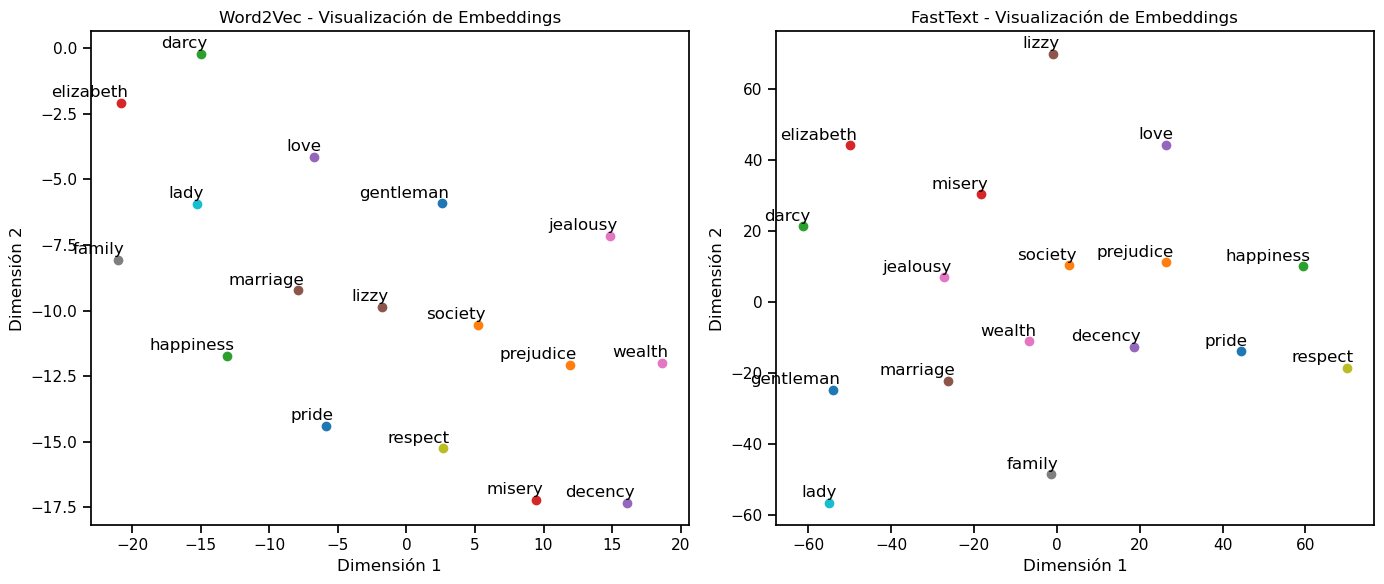

In [127]:
# Palabras seleccionadas
words = ['pride', 'prejudice', 'darcy', 'elizabeth', 'love', 'marriage', 'wealth', 'family','respect','lady','gentleman','society','happiness','misery','decency','lizzy','jealousy']

# Función para generar t-SNE y graficar los resultados
def plot_tsne(model, words, ax, title):
    # Extraer los vectores correspondientes a las palabras seleccionadas
    word_vectors = np.array([model.wv[word] for word in words])
    
    # Reducir la dimensionalidad a 2D usando t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=10)
    word_vectors_2d = tsne.fit_transform(word_vectors)

    # Graficar las palabras
    for i, word in enumerate(words):
        ax.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        ax.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]),
                    xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    
    # Configuración de la visualización
    ax.set_title(title)
    ax.set_xlabel("Dimensión 1")
    ax.set_ylabel("Dimensión 2")

# Crear los subgráficos en una sola fila
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graficar para el modelo Word2Vec
plot_tsne(model_WV, words, axes[0], "Word2Vec - Visualización de Embeddings")

# Graficar para el modelo FastText
plot_tsne(model_FT, words, axes[1], "FastText - Visualización de Embeddings")

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()